# 4 site Hermitian Ising Model
## Transverse Field Ising Model
The Hamiltonian for the 1D Transverse Field Ising Model is 

\begin{align*}
H &= -J \sum_{i=1}^{N-1} \sigma_i^x \sigma_{i+1}^x - h \sum_{i=1}^{N} \sigma_i^z \\
\end{align*}

In [53]:
from qiskit import QuantumCircuit
import scipy.linalg as la
import numpy as np
from qiskit.primitives import Estimator
from qiskit.quantum_info import Operator, SparsePauliOp
from scipy.optimize import minimize
from qiskit.circuit.library import TwoLocal

J = 1.0
h = 1.0

H = SparsePauliOp(['ZZII','IZZI','IIZZ','XIII','IXII','IIXI','IIIX'],
                          [-J, -J, -J, -h, -h, -h, -h])

# H = SparsePauliOp(['ZZI','IZZ','XII','IXI','IIX'],
#                           [-J, -J, -h, -h, -h])
  
def VQA_1st_Step(theta, Er):

  qc = ansatz.assign_parameters(theta)
  H_minusE = H + SparsePauliOp([H.num_qubits*'I'],[-Er])
  operator = (H_minusE.conjugate() @ H_minusE).simplify()
  estimator = Estimator()
  result = estimator.run(qc, operator).result()
  return result.values[0]


def VQA_2nd_Step(theta):
    
  ## theta contains Er as first element
  Er = theta[0]
  qc = ansatz.assign_parameters(theta[1:])
  H_minusE = H + SparsePauliOp([H.num_qubits*'I'],[-Er])
  operator = (H_minusE.conjugate() @ H_minusE).simplify()
  estimator = Estimator()
  result = estimator.run(qc, operator).result()
  return result.values[0]


def get_energy(Er0):
    
    x0 = np.random.random( len(ansatz.parameters) )

    result1 = minimize(lambda theta: VQA_1st_Step(theta,Er0), x0 = x0, method="BFGS") 

    x1 = np.concatenate(([Er0], result1.x))

    result2 = minimize(VQA_2nd_Step, x0 = x1, method="BFGS") 

    return [ result2.x[0], result2.fun ]

ansatz = TwoLocal(H.num_qubits, ['ry', 'rz'], 'cz',reps=3)
get_energy(0.5)

[np.float64(1.0000027742796795), np.float64(2.4052981828504016e-11)]

In [54]:
E0 = -4.9
Eset = []
while (E0 < 4.9):
    
    value = get_energy(E0)
    print(value)
    if value[1] < 1.0e-09:
        Eset.append(value[0])
    E0 += 0.3
    

[np.float64(-4.758770468853306), np.float64(8.01740895894909e-11)]
[np.float64(-4.758770510803551), np.float64(2.700630830076989e-10)]
[np.float64(-4.064177809245825), np.float64(4.82076600860637e-11)]
[np.float64(-4.0641737062806795), np.float64(7.679279434569253e-11)]
[np.float64(-4.064177556239088), np.float64(3.887823396553358e-11)]
[np.float64(-2.758771089902012), np.float64(2.7253754808498343e-10)]
[np.float64(-2.7587704983457817), np.float64(6.0274272017935e-08)]
[np.float64(-2.7587736544322823), np.float64(2.9260927014718163e-10)]
[np.float64(-2.758770506091863), np.float64(2.6528068630682355e-10)]
[np.float64(-2.064176399605712), np.float64(4.4071468696671445e-11)]
[np.float64(-2.064177614406979), np.float64(2.025425938079195e-10)]
[np.float64(-1.694592718103984), np.float64(3.3512748132125125e-11)]
[np.float64(-0.9999982271363587), np.float64(2.490882106166012e-10)]
[np.float64(-1.0000000000000018), np.float64(2.2891466500141178e-11)]
[np.float64(-1.0000000545448984), np.floa

## Plot of Entire Spectrum 
### Comparison b/w Exact Diagonalization and Variational Approach

array([-4.75877048, -4.06417777, -2.75877048, -2.06417777, -1.69459271,
       -1.        , -1.        , -0.30540729,  0.30540729,  1.        ,
        1.        ,  1.69459271,  2.06417777,  2.75877048,  4.06417777,
        4.75877048])

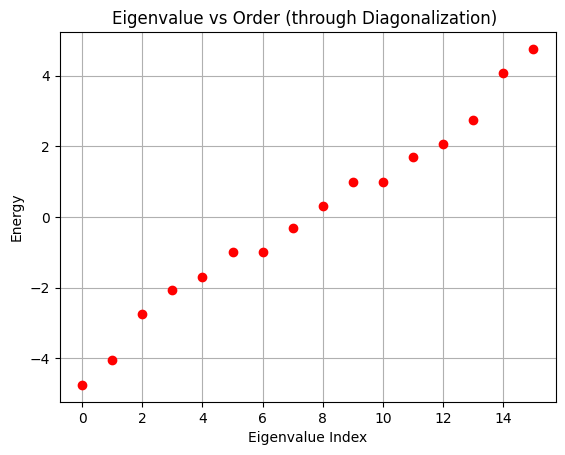

In [55]:
import matplotlib.pyplot as plt

energies = la.eig(H)[0].real
eng = np.sort(energies)
plt.xlabel("Eigenvalue Index")
plt.ylabel("Energy")
plt.plot(eng,'o',color='red')
plt.title("Eigenvalue vs Order (through Diagonalization) ")
plt.grid()
eng

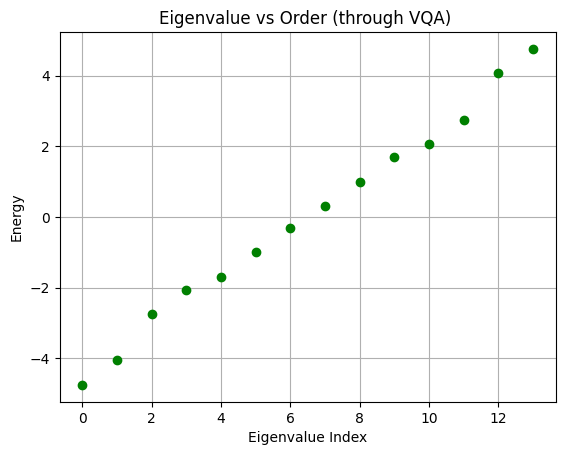

In [61]:
Eset11 = list(set([elem.round(4) for elem in Eset]))
plt.plot(np.sort(Eset11),'o',color='green')
plt.xlabel("Eigenvalue Index")
plt.ylabel("Energy")
plt.title("Eigenvalue vs Order (through VQA) ")
plt.grid()

In [67]:
eng76 = list(set(eng.round(4)))

print(eng76)
print(Eset11)

[np.float64(-0.3054), np.float64(0.3054), np.float64(1.0), np.float64(1.6946), np.float64(2.0642), np.float64(2.7588), np.float64(4.0642), np.float64(4.7588), np.float64(-4.0642), np.float64(-2.0642), np.float64(-1.0), np.float64(-4.7588), np.float64(-2.7588), np.float64(-1.6946)]
[np.float64(-0.3054), np.float64(0.3054), np.float64(1.0), np.float64(1.6946), np.float64(2.0642), np.float64(2.7588), np.float64(4.0642), np.float64(4.7588), np.float64(-4.0642), np.float64(-2.0642), np.float64(-1.0), np.float64(-4.7588), np.float64(-2.7588), np.float64(-1.6946)]


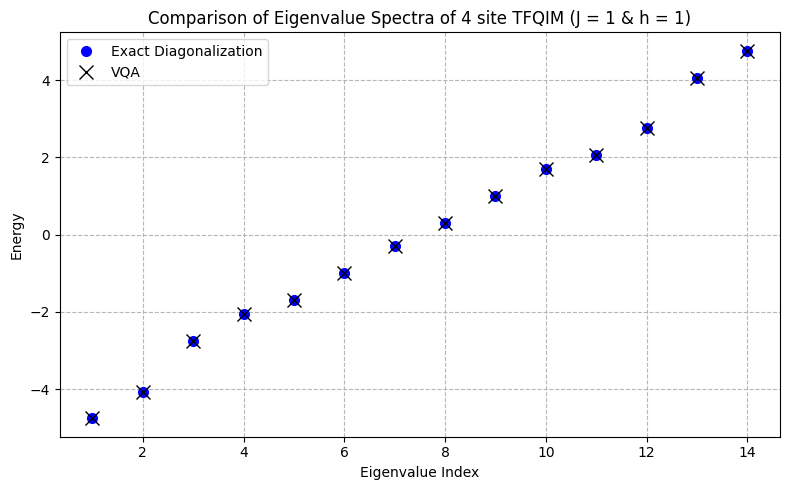

In [80]:
import numpy as np
import matplotlib.pyplot as plt

eigvals_ED = np.sort(eng76)      
eigvals_VQE = np.sort(Eset11) 

plt.figure(figsize=(8,5))
plt.plot(range(1,15), eigvals_ED, 'o', label='Exact Diagonalization', markersize=7,color='blue')
plt.plot(range(1,15), eigvals_VQE, 'x', label='VQA', markersize=10,color='black')
plt.xlabel("Eigenvalue Index")
plt.ylabel("Energy")
plt.title("Comparison of Eigenvalue Spectra of 4 site TFQIM (J = 1 & h = 1)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.9)
plt.grid(which="minor")
plt.tight_layout()
plt.show()
